In [449]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## A. Understanding Datasets
Dataset: "Spaceship Titanic" from Kaggle

DESCRIPTION: In this competition your task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help you make these predictions, we have a set of personal records recovered from the ship's damaged computer system.

Includes Training Dataset and Testing Dataset

In [450]:
train_df = pd.read_csv("spaceship_titanic_train.csv")
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [451]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [452]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [453]:
train_df.shape

(8693, 14)

In [454]:
test_df = pd.read_csv("spaceship_titanic_test.csv")
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [455]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [456]:
test_df.shape

(4277, 13)

## B. Data Cleaning and Preprocessing
* Using scikit-learn.preprocessing to convert strings to numerals for model training

* Filling null values in training dataset with mean values for data cleaning

* Extracting useful features for training sets

* Splitting unified values in dataframe for feature engineering

In [457]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [458]:
# Splitting PassengerId into group and Id
train_df[["Group", "PassengerId"]] = train_df["PassengerId"].str.split("_", expand=True)

In [459]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group
0,01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001
1,01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002
2,01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003
3,02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003
4,01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004


In [460]:
train_df.loc[train_df["Cabin"].isnull()].shape

(199, 15)

In [461]:
# Replacing - with null values for further preprocessing
train_df['Cabin'] = train_df['Cabin'].fillna("X/0/X")

In [462]:
train_df[["Deck", "Number", "Side"]] = train_df["Cabin"].str.split("/", expand=True)

In [463]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8693 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  Group         8693 non-null   object 
 15  Deck          8693 non-null   object 
 16  Number        8693 non-null   object 
 17  Side          8693 non-null   object 
dtypes: bool(1), float64(6), obje

In [464]:
train_df.shape

(8693, 18)

In [465]:
train_df.sample(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Deck,Number,Side
2727,01,Mars,True,F/611/P,55 Cancri e,41.0,False,0.0,0.0,0.0,0.0,0.0,Caw Panad,True,2927,F,611,P
5936,01,Earth,False,F/1305/P,TRAPPIST-1e,40.0,False,0.0,175.0,0.0,11.0,537.0,Idacey Mullon,False,6302,F,1305,P
7725,01,Earth,False,G/1331/S,TRAPPIST-1e,18.0,False,0.0,44.0,0.0,795.0,69.0,Jonard Cooks,False,8243,G,1331,S
5120,01,Europa,True,B/208/S,TRAPPIST-1e,32.0,NaN,0.0,0.0,0.0,0.0,0.0,Brafirk Unprive,True,5468,B,208,S
1947,01,Europa,False,C/72/P,TRAPPIST-1e,38.0,False,0.0,590.0,2640.0,6202.0,99.0,Algedia Unaasor,False,2085,C,72,P
3684,03,Earth,True,G/646/P,55 Cancri e,0.0,False,0.0,0.0,0.0,0.0,0.0,Maya Sullones,True,3959,G,646,P
3662,01,Earth,True,G/643/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Walla Mccarveymon,False,3935,G,643,S
2523,02,Mars,False,F/523/S,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Relix Welto,True,2709,F,523,S
5091,01,Earth,True,G/875/S,TRAPPIST-1e,7.0,False,0.0,0.0,0.0,0.0,0.0,Teryla Beckeey,True,5440,G,875,S
172,01,Mars,False,F/42/P,TRAPPIST-1e,39.0,False,406.0,0.0,867.0,0.0,0.0,Bar Floaf,True,0195,F,42,P


In [466]:
train_df["HomePlanet"].value_counts()
# 0: Earth
# 1: Europa
# 2: Mars

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [467]:
train_df["Deck"].value_counts()
# 0: A
# 1: B
# 2: C
# 3: D
# 4: E
# 5: F
# 6: G
# 7: T

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
X     199
T       5
Name: Deck, dtype: int64

In [468]:
train_df["Side"].value_counts()
# 0: P
# 1: S

S    4288
P    4206
X     199
Name: Side, dtype: int64

In [469]:
train_df["Destination"].value_counts()
# 0: 55 Cancri e 
# 1: PSO J318.5-22 
# 2: TRAPPIST-1e

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [470]:
# 0: False
# 1: True 
# for truth table entries

In [471]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8693 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  Group         8693 non-null   object 
 15  Deck          8693 non-null   object 
 16  Number        8693 non-null   object 
 17  Side          8693 non-null   object 
dtypes: bool(1), float64(6), obje

## C. Feature Engineering
* Replacing null values in dataframe columns with mean values
* Creating useful features (relevant) efficient for model training

In [472]:
df = pd.DataFrame(
    {
        "PassengerId": train_df.iloc[:, 0].astype(int),
        "Group": train_df.iloc[:, 14].astype(int),
        "Home_planet": label_encoder.fit_transform(train_df.iloc[:, 1]),
        "Deck": label_encoder.fit_transform(train_df.iloc[:, 15]),
        "Cabin_number": train_df.iloc[:, 16].astype(int),
        "Cabin_side": label_encoder.fit_transform(train_df.iloc[:, 17]),
        "CryoSleep": label_encoder.fit_transform(train_df.iloc[:, 2]),
        "Destination": label_encoder.fit_transform(train_df.iloc[:, 4]),
        "Age": train_df.iloc[:, 5],
        "VIP": label_encoder.fit_transform(train_df.iloc[:, 6]),
        "Room_service": train_df.iloc[:, 7],
        "Food_court": train_df.iloc[:, 8],
        "Shopping_mall": train_df.iloc[:, 9],
        "Spa": train_df.iloc[:, 10],
        "VR_deck": train_df.iloc[:, 11],
        "Transported": label_encoder.fit_transform(train_df.iloc[:, 13])
    }
)

In [473]:
df.head()

,PassengerId,Group,Home_planet,Deck,Cabin_number,Cabin_side,CryoSleep,Destination,Age,VIP,Room_service,Food_court,Shopping_mall,Spa,VR_deck,Transported
0,1,1,1,1,0,0,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,1,2,0,5,0,1,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,1,3,1,0,0,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,2,3,1,0,0,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,1,4,0,5,1,1,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1


In [474]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    8693 non-null   int32  
 1   Group          8693 non-null   int32  
 2   Home_planet    8693 non-null   int32  
 3   Deck           8693 non-null   int32  
 4   Cabin_number   8693 non-null   int32  
 5   Cabin_side     8693 non-null   int32  
 6   CryoSleep      8693 non-null   int32  
 7   Destination    8693 non-null   int32  
 8   Age            8514 non-null   float64
 9   VIP            8693 non-null   int32  
 10  Room_service   8512 non-null   float64
 11  Food_court     8510 non-null   float64
 12  Shopping_mall  8485 non-null   float64
 13  Spa            8510 non-null   float64
 14  VR_deck        8505 non-null   float64
 15  Transported    8693 non-null   int64  
dtypes: float64(6), int32(9), int64(1)
memory usage: 781.1 KB


In [475]:
df["Transported"].value_counts()

1    4378
0    4315
Name: Transported, dtype: int64

In [476]:
df.iloc[6018, 7] # PSO J318.5-22 

1

In [477]:
# Label-Encoded values
df.loc[df["Cabin_side"] == 2, "Cabin_side"] = 0.5
df.loc[df["CryoSleep"] == 2, "CryoSleep"] = 0.5
df.loc[df["Home_planet"] == 3, "Home_planet"] = 1
df.loc[df["Destination"] == 3, "Destination"] = 1
df.loc[df["VIP"] == 2, "VIP"] = 0.5

# Float-values
df.loc[df["Age"].isnull(), "Age"] = df["Age"].mean()
df.loc[df["Room_service"].isnull(), "Room_service"] = df["Room_service"].mean()
df.loc[df["Food_court"].isnull(), "Food_court"] = df["Food_court"].mean()
df.loc[df["Shopping_mall"].isnull(), "Shopping_mall"] = df["Shopping_mall"].mean()
df.loc[df["Spa"].isnull(), "Spa"] = df["Spa"].mean()
df.loc[df["VR_deck"].isnull(), "VR_deck"] = df["VR_deck"].mean()

In [478]:
df["VIP"].value_counts()

0.0    8291
0.5     203
1.0     199
Name: VIP, dtype: int64

In [479]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    8693 non-null   int32  
 1   Group          8693 non-null   int32  
 2   Home_planet    8693 non-null   int32  
 3   Deck           8693 non-null   int32  
 4   Cabin_number   8693 non-null   int32  
 5   Cabin_side     8693 non-null   float64
 6   CryoSleep      8693 non-null   float64
 7   Destination    8693 non-null   int32  
 8   Age            8693 non-null   float64
 9   VIP            8693 non-null   float64
 10  Room_service   8693 non-null   float64
 11  Food_court     8693 non-null   float64
 12  Shopping_mall  8693 non-null   float64
 13  Spa            8693 non-null   float64
 14  VR_deck        8693 non-null   float64
 15  Transported    8693 non-null   int64  
dtypes: float64(9), int32(6), int64(1)
memory usage: 883.0 KB


In [480]:
df.describe()

,PassengerId,Group,Home_planet,Deck,Cabin_number,Cabin_side,CryoSleep,Destination,Age,VIP,Room_service,Food_court,Shopping_mall,Spa,VR_deck,Transported
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,1.517773,4633.389624,0.672955,4.389969,586.624065,0.504716,0.361843,1.473369,28.827930,0.034568,224.687617,458.077203,173.729169,311.138778,304.854791,0.503624
std,1.054241,2671.028856,0.790476,1.842573,513.880084,0.494250,0.474023,0.814551,14.339054,0.165946,659.739364,1594.434978,597.417440,1124.675871,1133.259049,0.500016
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2319.000000,0.000000,3.000000,152.000000,0.000000,0.000000,1.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,4630.000000,0.000000,5.000000,407.000000,0.500000,0.000000,2.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2.000000,6883.000000,1.000000,6.000000,983.000000,1.000000,1.000000,2.000000,37.000000,0.000000,78.000000,118.000000,45.000000,89.000000,71.000000,1.000000
max,8.000000,9280.000000,2.000000,8.000000,1894.000000,1.000000,1.000000,2.000000,79.000000,1.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000


In [481]:
df.shape

(8693, 16)

In [482]:
x_train = df.iloc[:, :15].to_numpy()
y_train = df.iloc[:, 15].to_numpy()

In [483]:
x_train.shape, y_train.shape

((8693, 15), (8693,))

## D. Data Visualization
Using matplotlib for visualizing data to understand relevant and important features affecting the model's performance

In [484]:
pos = y_train == 1 # Transported
neg = y_train == 0 # Not Transported

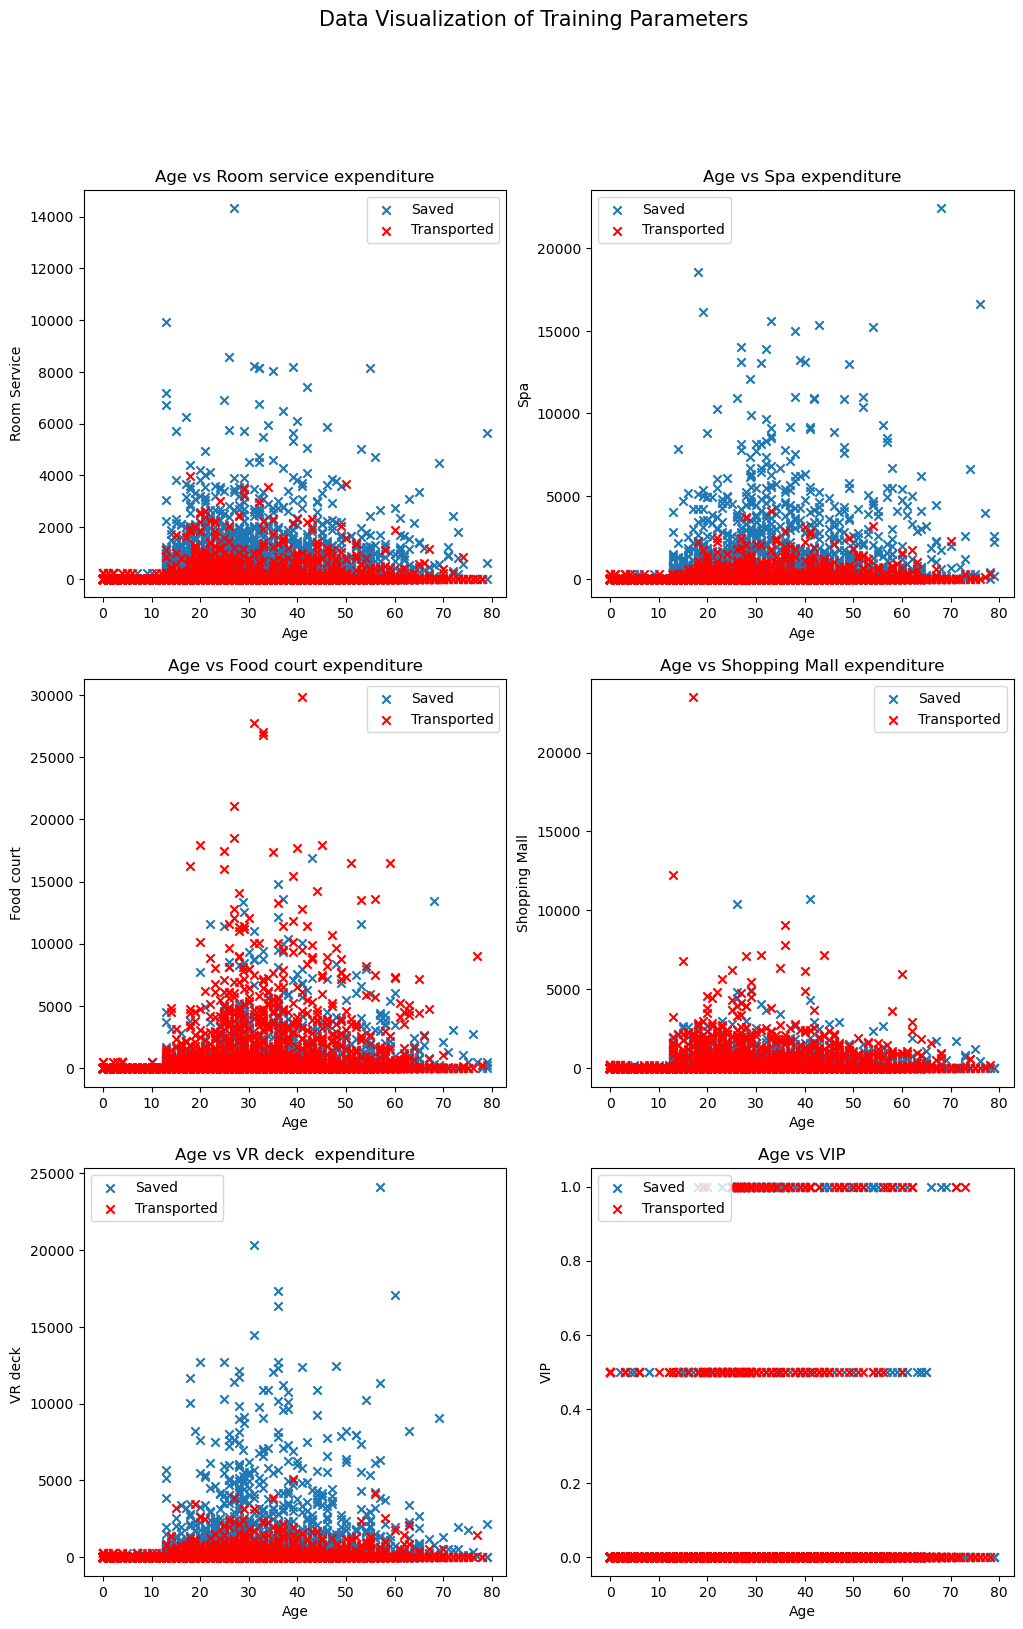

In [485]:
fig, ax = plt.subplots(3, 2, figsize=(12, 18))

# Age vs Room service expenditure
ax[0, 0].scatter(x_train[neg, 8], x_train[neg, 10], marker="x", label="Saved")
ax[0, 0].scatter(x_train[pos, 8], x_train[pos, 10], marker="x", c="r", label="Transported")
ax[0, 0].set_xlabel("Age")
ax[0, 0].set_ylabel("Room Service")
ax[0, 0].set_title("Age vs Room service expenditure")
ax[0, 0].legend()

# Age vs Spa expenditure
ax[0, 1].scatter(x_train[neg, 8], x_train[neg, 13], marker="x", label="Saved")
ax[0, 1].scatter(x_train[pos, 8], x_train[pos, 13], marker="x", c="r", label="Transported")
ax[0, 1].set_xlabel("Age")
ax[0, 1].set_ylabel("Spa")
ax[0, 1].set_title("Age vs Spa expenditure")
ax[0, 1].legend()

# Age vs Food court expenditure
ax[1, 0].scatter(x_train[neg, 8], x_train[neg, 11], marker="x", label="Saved")
ax[1, 0].scatter(x_train[pos, 8], x_train[pos, 11], marker="x", c="r", label="Transported")
ax[1, 0].set_xlabel("Age")
ax[1, 0].set_ylabel("Food court")
ax[1, 0].set_title("Age vs Food court expenditure")
ax[1, 0].legend()

# Age vs Shopping Mall expenditure
ax[1, 1].scatter(x_train[neg, 8], x_train[neg, 12], marker="x", label="Saved")
ax[1, 1].scatter(x_train[pos, 8], x_train[pos, 12], marker="x", c="r", label="Transported")
ax[1, 1].set_xlabel("Age")
ax[1, 1].set_ylabel("Shopping Mall")
ax[1, 1].set_title("Age vs Shopping Mall expenditure")
ax[1, 1].legend()

# Age vs VR deck expenditure
ax[2, 0].scatter(x_train[neg, 8], x_train[neg, 14], marker="x", label="Saved")
ax[2, 0].scatter(x_train[pos, 8], x_train[pos, 14], marker="x", c="r", label="Transported")
ax[2, 0].set_xlabel("Age")
ax[2, 0].set_ylabel("VR deck ")
ax[2, 0].set_title("Age vs VR deck  expenditure")
ax[2, 0].legend()

# Age vs VIP
ax[2, 1].scatter(x_train[neg, 8], x_train[neg, 9], marker="x", label="Saved")
ax[2, 1].scatter(x_train[pos, 8], x_train[pos, 9], marker="x", c="r", label="Transported")
ax[2, 1].set_xlabel("Age")
ax[2, 1].set_ylabel("VIP")
ax[2, 1].set_title("Age vs VIP")
ax[2, 1].legend()

plt.suptitle("Data Visualization of Training Parameters", fontsize=15)
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()

## E. Data Normalization
Using Mean normalization to restrict the range of data values between (-1, 1) 
* Leads to faster mathematical computations 
* Increases accuracy of fitting parameters
* Faster model training 

In [486]:
def mean_normalize(z):
    m, n = z.shape
    data = np.zeros((m,n))
    for i in range(m):
        for j in range(n):
            data[i, j] = float((z[i, j] - z[:, j].mean()) / m)
    return data

In [487]:
arr = np.array([[1, 2, 3], [1, 3, 4]])
mean_normalize(arr)

array([[ 0.  , -0.25, -0.25],
       [ 0.  ,  0.25,  0.25]])

In [488]:
x_train = mean_normalize(x_train)

In [489]:
x_train[:5]

array([[-5.95620523e-05, -5.32887337e-01,  3.76216207e-05,
        -3.89965368e-04, -6.74823496e-02, -5.80600988e-05,
        -4.16246246e-05,  6.05809988e-05,  1.17014489e-03,
        -3.97653782e-06, -2.58469593e-02, -5.26949503e-02,
        -1.99849499e-02, -3.57918760e-02, -3.50689970e-02],
       [-5.95620523e-05, -5.32772302e-01, -7.74134650e-05,
         7.01749752e-05, -6.74823496e-02,  5.69749869e-05,
        -4.16246246e-05,  6.05809988e-05, -5.55381395e-04,
        -3.97653782e-06, -1.33081350e-02, -5.16596346e-02,
        -1.71090727e-02,  2.73623861e-02, -3.00074533e-02],
       [-5.95620523e-05, -5.32657267e-01,  3.76216207e-05,
        -5.05000453e-04, -6.74823496e-02,  5.69749869e-05,
        -4.16246246e-05,  6.05809988e-05,  3.35581152e-03,
         1.11058548e-04, -2.09004506e-02,  3.58670516e-01,
        -1.99849499e-02,  7.36668725e-01, -2.94322778e-02],
       [ 5.54730334e-05, -5.32657267e-01,  3.76216207e-05,
        -5.05000453e-04, -6.74823496e-02,  5.69749869

## # Data Visualization post normalization
Reduced range of data inputs

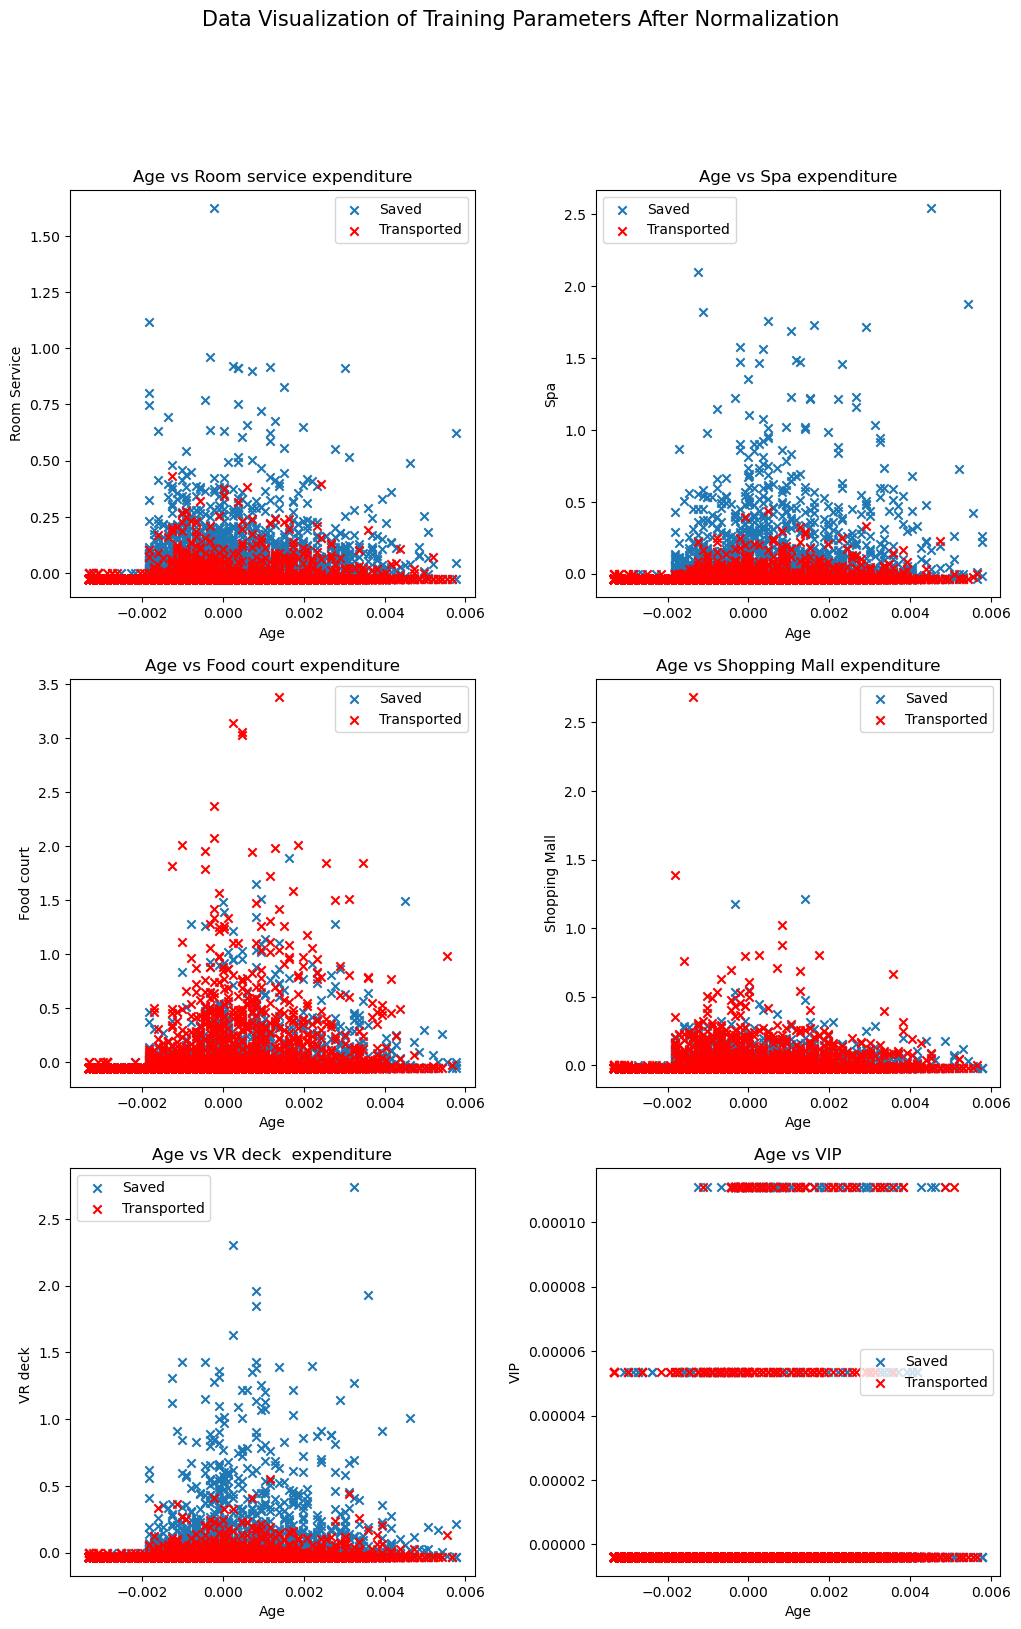

In [490]:
fig, ax = plt.subplots(3, 2, figsize=(12, 18))

# Age vs Room service expenditure
ax[0, 0].scatter(x_train[neg, 8], x_train[neg, 10], marker="x", label="Saved")
ax[0, 0].scatter(x_train[pos, 8], x_train[pos, 10], marker="x", c="r", label="Transported")
ax[0, 0].set_xlabel("Age")
ax[0, 0].set_ylabel("Room Service")
ax[0, 0].set_title("Age vs Room service expenditure")
ax[0, 0].legend()

# Age vs Spa expenditure
ax[0, 1].scatter(x_train[neg, 8], x_train[neg, 13], marker="x", label="Saved")
ax[0, 1].scatter(x_train[pos, 8], x_train[pos, 13], marker="x", c="r", label="Transported")
ax[0, 1].set_xlabel("Age")
ax[0, 1].set_ylabel("Spa")
ax[0, 1].set_title("Age vs Spa expenditure")
ax[0, 1].legend()

# Age vs Food court expenditure
ax[1, 0].scatter(x_train[neg, 8], x_train[neg, 11], marker="x", label="Saved")
ax[1, 0].scatter(x_train[pos, 8], x_train[pos, 11], marker="x", c="r", label="Transported")
ax[1, 0].set_xlabel("Age")
ax[1, 0].set_ylabel("Food court")
ax[1, 0].set_title("Age vs Food court expenditure")
ax[1, 0].legend()

# Age vs Shopping Mall expenditure
ax[1, 1].scatter(x_train[neg, 8], x_train[neg, 12], marker="x", label="Saved")
ax[1, 1].scatter(x_train[pos, 8], x_train[pos, 12], marker="x", c="r", label="Transported")
ax[1, 1].set_xlabel("Age")
ax[1, 1].set_ylabel("Shopping Mall")
ax[1, 1].set_title("Age vs Shopping Mall expenditure")
ax[1, 1].legend()

# Age vs VR deck expenditure
ax[2, 0].scatter(x_train[neg, 8], x_train[neg, 14], marker="x", label="Saved")
ax[2, 0].scatter(x_train[pos, 8], x_train[pos, 14], marker="x", c="r", label="Transported")
ax[2, 0].set_xlabel("Age")
ax[2, 0].set_ylabel("VR deck ")
ax[2, 0].set_title("Age vs VR deck  expenditure")
ax[2, 0].legend()

# Age vs VIP
ax[2, 1].scatter(x_train[neg, 8], x_train[neg, 9], marker="x", label="Saved")
ax[2, 1].scatter(x_train[pos, 8], x_train[pos, 9], marker="x", c="r", label="Transported")
ax[2, 1].set_xlabel("Age")
ax[2, 1].set_ylabel("VIP")
ax[2, 1].set_title("Age vs VIP")
ax[2, 1].legend()

plt.suptitle("Data Visualization of Training Parameters After Normalization", fontsize=15)
plt.subplots_adjust(wspace=0.3, hspace=0.2)
plt.show()

## F. Model Training (Mathematical Modelling)
Using Tensorflow for fitting data points to train the model with appropriate parameters (weights/bias) for predictions
=> Logistic Regression
* Sequential Model (Binary Classification)
* Adam Optimizer
* Sigmoid activation: g(z) = 1 / (1 + np.exp(-z))
* Binary Cross-entropy loss function

In [491]:
import tensorflow as tf

In [492]:
model = tf.keras.models.Sequential(
    [
        tf.keras.Input(shape=(15,)),
        tf.keras.layers.Dense(units=1000, activation='relu', name='layer_1'),
        tf.keras.layers.Dense(units=750, activation='relu', name='layer_2'),
        tf.keras.layers.Dense(units=300, activation='relu', name='layer_3'),
        tf.keras.layers.Dense(units=100, activation='relu', name='layer_4'),
        tf.keras.layers.Dense(units=50, activation='relu', name='layer_5'),
        tf.keras.layers.Dense(units=1, activation='linear', name='output_layer')
    ], name='spaceship_titanic_survival_model'
)

In [493]:
model.summary()

Model: "spaceship_titanic_survival_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 1000)              16000     
                                                                 
 layer_2 (Dense)             (None, 750)               750750    
                                                                 
 layer_3 (Dense)             (None, 300)               225300    
                                                                 
 layer_4 (Dense)             (None, 100)               30100     
                                                                 
 layer_5 (Dense)             (None, 50)                5050      
                                                                 
 output_layer (Dense)        (None, 1)                 51        
                                                                 
Total params: 1027251 (3.92 MB)
Tr

In [494]:
[layer_1, layer_2, layer_3, layer_4, layer_5, layer_6] = model.layers

In [497]:
w0, b0 = layer_1.get_weights()
w1, b1 = layer_2.get_weights()
w2, b2 = layer_3.get_weights()
w3, b3 = layer_4.get_weights()
w4, b4 = layer_5.get_weights()
w5, b5 = layer_6.get_weights()
weights = [w0, w1, w2, w3, w4, w5]
bias = [b0, b1, b2, b3, b4, b5]
for i in range(6):
    print(f"w[{i}].shape: {weights[i].shape} ===> b[{i}].shape: {bias[i].shape}")

w[0].shape: (15, 1000) ===> b[0].shape: (1000,)
w[1].shape: (1000, 750) ===> b[1].shape: (750,)
w[2].shape: (750, 300) ===> b[2].shape: (300,)
w[3].shape: (300, 100) ===> b[3].shape: (100,)
w[4].shape: (100, 50) ===> b[4].shape: (50,)
w[5].shape: (50, 1) ===> b[5].shape: (1,)


In [499]:
b5, w5[:10].T

(array([0.], dtype=float32),
 array([[ 0.17241749, -0.03636685, -0.23579952, -0.23338635, -0.29492977,
          0.3327171 ,  0.15481782,  0.32746807,  0.33589116,  0.12750891]],
       dtype=float32))

In [503]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
)

In [504]:
hist = model.fit(x_train, y_train, epochs=100, batch_size=80)

Epoch 1/100
109/109 [==============================] - 4s 24ms/step - loss: 0.2940
Epoch 2/100
109/109 [==============================] - 4s 37ms/step - loss: 0.2786
Epoch 3/100
109/109 [==============================] - 5s 43ms/step - loss: 0.2726
Epoch 4/100
109/109 [==============================] - 4s 34ms/step - loss: 0.2685
Epoch 5/100
109/109 [==============================] - 3s 31ms/step - loss: 0.2655
Epoch 6/100
109/109 [==============================] - 4s 39ms/step - loss: 0.2635
Epoch 7/100
109/109 [==============================] - 5s 44ms/step - loss: 0.2618
Epoch 8/100
109/109 [==============================] - 4s 39ms/step - loss: 0.2595
Epoch 9/100
109/109 [==============================] - 4s 35ms/step - loss: 0.2570
Epoch 10/100
109/109 [==============================] - 5s 44ms/step - loss: 0.2554
Epoch 11/100
109/109 [==============================] - 4s 39ms/step - loss: 0.2560
Epoch 12/100
109/109 [==============================] - 4s 33ms/step - loss: 0.2529
E

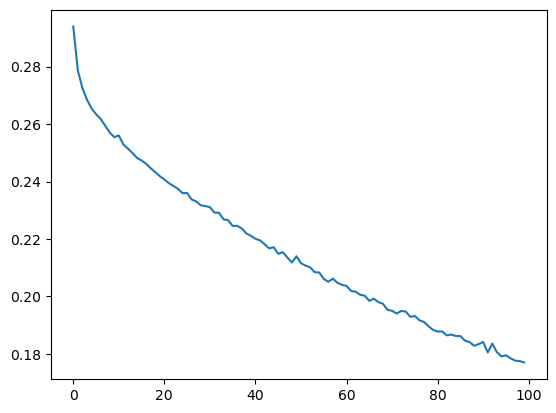

In [505]:
plt.plot(hist.history['loss'])

## G. Predicting Values
Using trained model (the model has figured out the best fitting parameters for each neuron in ANN) to predict values on training and testing datasets

In [506]:
y_train[1000]

1

In [507]:
model.predict(x_train[1000].reshape(1, 15))

1/1 [==============================] - 0s 189ms/step


array([[12.651243]], dtype=float32)

In [508]:
def predict_func(z):
    m = z.shape[0]
    data = np.zeros(m,)
    for i in range(m):
        data[i] = model.predict(z[i].reshape(1, 15))
        if (data[i] >= 0.5):
            data[i] = 1
        else:
            data[i] = 0
    return data

In [509]:
train_predictions = predict_func(x_train)

1/1 [==============================] - 0s 52ms/step


1/1 [==============================] - 0s 121ms/step


1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


## # Predicting on Testing Dataset
* Data Cleaning on testing dataframe
* filling null values in dataframe
* preprocessing textual labels to numerical values
* extracting and creating useful features => Feature Engineering
* creating testing dataset and normalizing it to restrict its data values between (-1, 1)
* predicting on this obtained dataset

In [511]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [512]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [513]:
test_df.shape

(4277, 13)

In [514]:
test_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [515]:
# Splitting PassengerId into group and Id
test_df[["Group", "PassengerId"]] = test_df["PassengerId"].str.split("_", expand=True)

In [517]:
test_df.loc[test_df["Cabin"].isnull()].shape

(100, 14)

In [518]:
# Replacing - with null values for further preprocessing
test_df['Cabin'] = test_df['Cabin'].fillna("X/0/X")

In [521]:
test_df[["Deck", "Number", "Side"]] = test_df["Cabin"].str.split("/", expand=True)

In [523]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4277 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
 13  Group         4277 non-null   object 
 14  Deck          4277 non-null   object 
 15  Number        4277 non-null   object 
 16  Side          4277 non-null   object 
dtypes: float64(6), object(11)
memory usage: 568.2+ KB


In [522]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Group,Deck,Number,Side
0,01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0013,G,3,S
1,01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,0018,F,4,S
2,01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0019,C,0,S
3,01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,0021,C,1,S
4,01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,0023,F,5,S


In [524]:
test_dataset = pd.DataFrame(
    {
        "PassengerId": test_df.iloc[:, 0].astype(int),
        "Group": test_df.iloc[:, 13].astype(int),
        "Home_planet": label_encoder.fit_transform(test_df.iloc[:, 1]),
        "Deck": label_encoder.fit_transform(test_df.iloc[:, 14]),
        "Cabin_number": test_df.iloc[:, 15].astype(int),
        "Cabin_side": label_encoder.fit_transform(test_df.iloc[:, 16]),
        "CryoSleep": label_encoder.fit_transform(test_df.iloc[:, 2]),
        "Destination": label_encoder.fit_transform(test_df.iloc[:, 4]),
        "Age": test_df.iloc[:, 5],
        "VIP": label_encoder.fit_transform(test_df.iloc[:, 6]),
        "Room_service": test_df.iloc[:, 7],
        "Food_court": test_df.iloc[:, 8],
        "Shopping_mall": test_df.iloc[:, 9],
        "Spa": test_df.iloc[:, 10],
        "VR_deck": test_df.iloc[:, 11]
    }
)

In [525]:
test_dataset.head()

,PassengerId,Group,Home_planet,Deck,Cabin_number,Cabin_side,CryoSleep,Destination,Age,VIP,Room_service,Food_court,Shopping_mall,Spa,VR_deck
0,1,13,0,6,3,1,1,2,27.0,0,0.0,0.0,0.0,0.0,0.0
1,1,18,0,5,4,1,0,2,19.0,0,0.0,9.0,0.0,2823.0,0.0
2,1,19,1,2,0,1,1,0,31.0,0,0.0,0.0,0.0,0.0,0.0
3,1,21,1,2,1,1,0,2,38.0,0,0.0,6652.0,0.0,181.0,585.0
4,1,23,0,5,5,1,0,2,20.0,0,10.0,0.0,635.0,0.0,0.0


In [526]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    4277 non-null   int32  
 1   Group          4277 non-null   int32  
 2   Home_planet    4277 non-null   int32  
 3   Deck           4277 non-null   int32  
 4   Cabin_number   4277 non-null   int32  
 5   Cabin_side     4277 non-null   int32  
 6   CryoSleep      4277 non-null   int32  
 7   Destination    4277 non-null   int32  
 8   Age            4186 non-null   float64
 9   VIP            4277 non-null   int32  
 10  Room_service   4195 non-null   float64
 11  Food_court     4171 non-null   float64
 12  Shopping_mall  4179 non-null   float64
 13  Spa            4176 non-null   float64
 14  VR_deck        4197 non-null   float64
dtypes: float64(6), int32(9)
memory usage: 351.0 KB


In [527]:
# Label-Encoded values
test_dataset.loc[test_dataset["Cabin_side"] == 2, "Cabin_side"] = 0.5
test_dataset.loc[test_dataset["CryoSleep"] == 2, "CryoSleep"] = 0.5
test_dataset.loc[test_dataset["Home_planet"] == 3, "Home_planet"] = 1
test_dataset.loc[test_dataset["Destination"] == 3, "Destination"] = 1
test_dataset.loc[test_dataset["VIP"] == 2, "VIP"] = 0.5

# Float-values
test_dataset.loc[test_dataset["Age"].isnull(), "Age"] = test_dataset["Age"].mean()
test_dataset.loc[test_dataset["Room_service"].isnull(), "Room_service"] = test_dataset["Room_service"].mean()
test_dataset.loc[test_dataset["Food_court"].isnull(), "Food_court"] = test_dataset["Food_court"].mean()
test_dataset.loc[test_dataset["Shopping_mall"].isnull(), "Shopping_mall"] = test_dataset["Shopping_mall"].mean()
test_dataset.loc[test_dataset["Spa"].isnull(), "Spa"] = test_dataset["Spa"].mean()
test_dataset.loc[test_dataset["VR_deck"].isnull(), "VR_deck"] = test_dataset["VR_deck"].mean()

In [528]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    4277 non-null   int32  
 1   Group          4277 non-null   int32  
 2   Home_planet    4277 non-null   int32  
 3   Deck           4277 non-null   int32  
 4   Cabin_number   4277 non-null   int32  
 5   Cabin_side     4277 non-null   float64
 6   CryoSleep      4277 non-null   float64
 7   Destination    4277 non-null   int32  
 8   Age            4277 non-null   float64
 9   VIP            4277 non-null   float64
 10  Room_service   4277 non-null   float64
 11  Food_court     4277 non-null   float64
 12  Shopping_mall  4277 non-null   float64
 13  Spa            4277 non-null   float64
 14  VR_deck        4277 non-null   float64
dtypes: float64(9), int32(6)
memory usage: 401.1 KB


In [529]:
x_test = test_dataset.iloc[:, :].to_numpy()

In [530]:
x_test[0]

array([ 1., 13.,  0.,  6.,  3.,  1.,  1.,  2., 27.,  0.,  0.,  0.,  0.,
        0.,  0.])

In [532]:
x_test.shape

(4277, 15)

In [533]:
x_test = mean_normalize(x_test)
x_test[0]

array([-1.16603706e-04, -1.08166857e+00, -1.60664929e-04,  3.65008414e-04,
       -1.38628086e-01,  1.16658373e-04,  1.46861630e-04,  1.18189036e-04,
       -3.87689082e-04, -6.58731674e-06, -5.12663711e-02, -1.02755272e-01,
       -4.14532442e-02, -7.08563111e-02, -7.26467222e-02])

In [534]:
test_predictions = predict_func(x_test)

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 16ms/step


In [539]:
test_predictions[1]

0.0

In [540]:
def prediction(z):
    p = model.predict(z.reshape(1, 15))
    if (p >= 0.5):
        p = 1
        print(f'Transported!')
    else:
        p = 0
        print(f'Not Transported.')
    return p

## H. Evaluating Preformance
Evaluating the performance of model on training dataset by determining the accuracy of predictions

In [541]:
def accuracy(x, y):
    m = x.shape[0]
    count = 0
    for i in range(m):
        if (x[i] == y[i]):
            count += 1
    acc = float(count / m)
    return acc

In [542]:
train_accuracy = accuracy(train_predictions, y_train)
print(f'Training Accuracy: {train_accuracy * 100}%')

Training Accuracy: 90.19901069826297%


In [546]:
import joblib

joblib.dump(model, "spaceship_titanic_model.joblib")

['spaceship_titanic_model.joblib']

## G. Saving test predictions in submission form
DataFrame columns required:
* PassengerId
* Transported (True/False)

In [551]:
test_file = pd.read_csv("spaceship_titanic_test.csv")
test_file.sample(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
1389,2978_01,Mars,False,F/565/S,TRAPPIST-1e,36.0,False,3.0,0.0,345.0,1.0,960.0,Lers Botte
1572,3369_01,Europa,False,E/229/S,TRAPPIST-1e,26.0,False,172.0,7508.0,1698.0,109.0,11333.0,Gacrab Amspring
752,1522_01,Mars,True,F/296/S,TRAPPIST-1e,27.0,False,NaN,0.0,0.0,0.0,0.0,Prabon Bancy
1260,2674_02,Earth,False,G/425/S,TRAPPIST-1e,22.0,False,0.0,75.0,688.0,42.0,3.0,Hary Spencervan
730,1492_02,Europa,False,C/57/S,55 Cancri e,73.0,False,22.0,30.0,0.0,1616.0,103.0,Algrafi Aneetle


In [552]:
result_df = pd.DataFrame(
    {
        "PassengerId": test_file.iloc[:, 0],
        "Transported": test_predictions[:]
    }
)

In [555]:
result_df.loc[result_df["Transported"] == 1, "Transported"] = "True"
result_df.loc[result_df["Transported"] == 0, "Transported"] = "False"

In [560]:
result_df.head() # Submission file ready!!

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [562]:
result_df.shape

(4277, 2)

In [561]:
result_df.to_csv("spaceship_titanic_result.csv", index=False)